# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [53]:
# Import numpy and pandas
import numpy as np
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Import the dataset
from sklearn.datasets import load_iris

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [54]:
# Run this code:

sensor = pd.read_csv('../data/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

1. Examine the data using the `head` function.

In [55]:
# Your code here:
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


2. Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [56]:
# Your code here:

print(sensor.isnull().sum(),"\n")
print(sensor.info())

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 1

3. How many rows and columns are in our data?

In [57]:
# Your code here:
n_rows = sensor.shape[0]
print(n_rows)

1751


4. To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [87]:
# Your code here:
# Step 2: Create a datetime index with the same number of rows
end_time = pd.Timestamp('2018-01-01 00:00:00') + pd.Timedelta(seconds=n_rows-1)

time_index = pd.date_range(
    start = '2018-01-01 00:00:00',
    end = end_time,
    periods=n_rows,
)
time_index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

5. Assign the time series index to the dataframe's index.

In [59]:
# Your code here:
sensor.index = time_index
display(sensor.head())
print(time_index.freq)  # Output: 'S' (seconds) if spacing is 1 second


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


None


6. Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

In [ ]:
# Your code here:
# from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
decomposition_add = sm.tsa.seasonal_decompose(
    sensor['userAcceleration.x'],
    model='additive',
    period=60
)

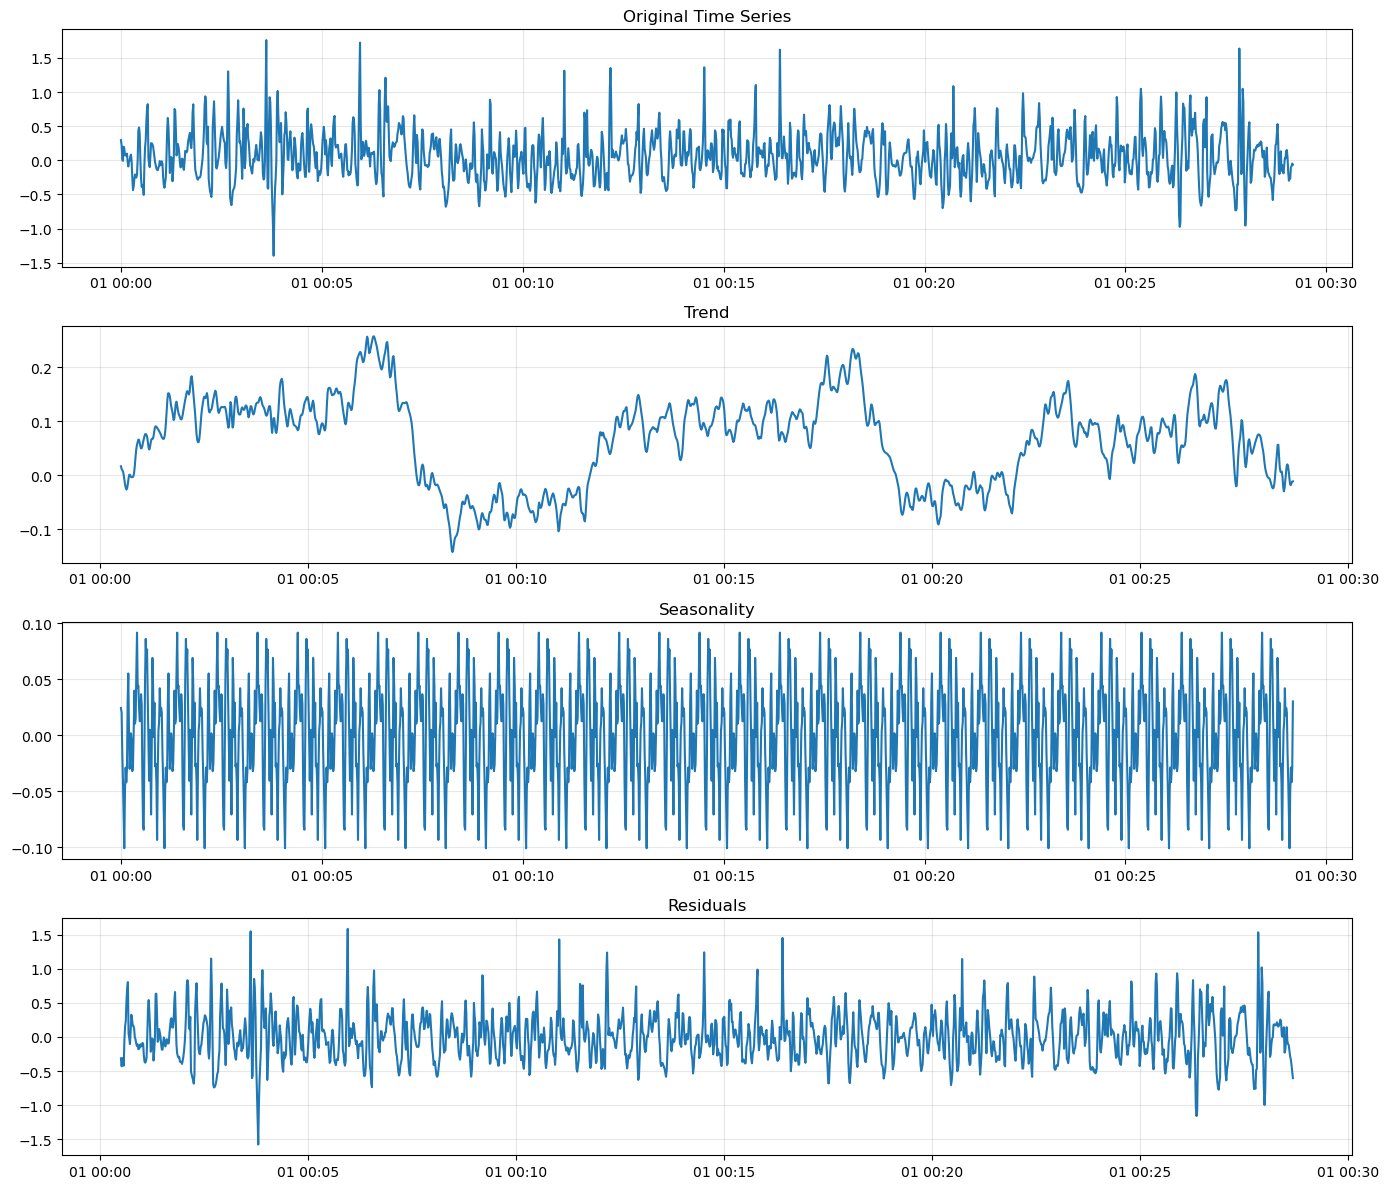

In [61]:
plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(decomposition_add.observed)
plt.title('Original Time Series')
plt.grid(True, alpha=0.3)

plt.subplot(412)
plt.plot(decomposition_add.trend)
plt.title('Trend')
plt.grid(True, alpha=0.3)

plt.subplot(413)
plt.plot(decomposition_add.seasonal)
plt.title('Seasonality')
plt.grid(True, alpha=0.3)

plt.subplot(414)
plt.plot(decomposition_add.resid)
plt.title('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

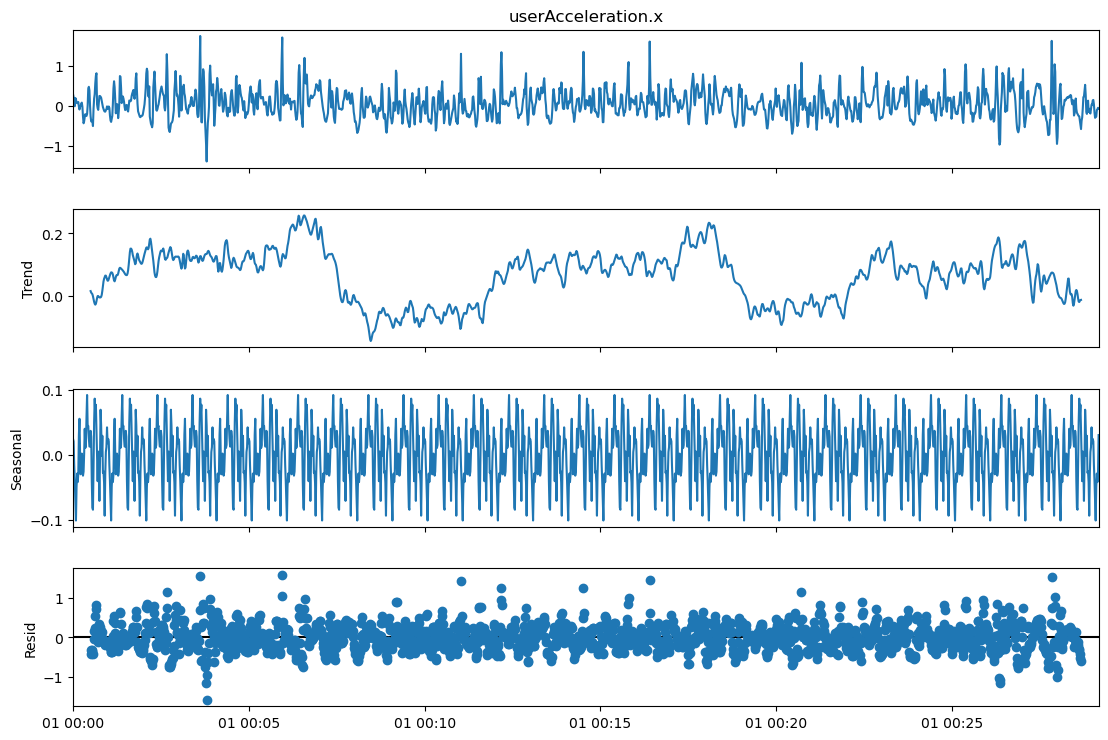

In [52]:
# Plot the decomposed components

fig = decomposition_add.plot()
fig.set_size_inches(12, 8)  # Adjust plot size
plt.show()

7. Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

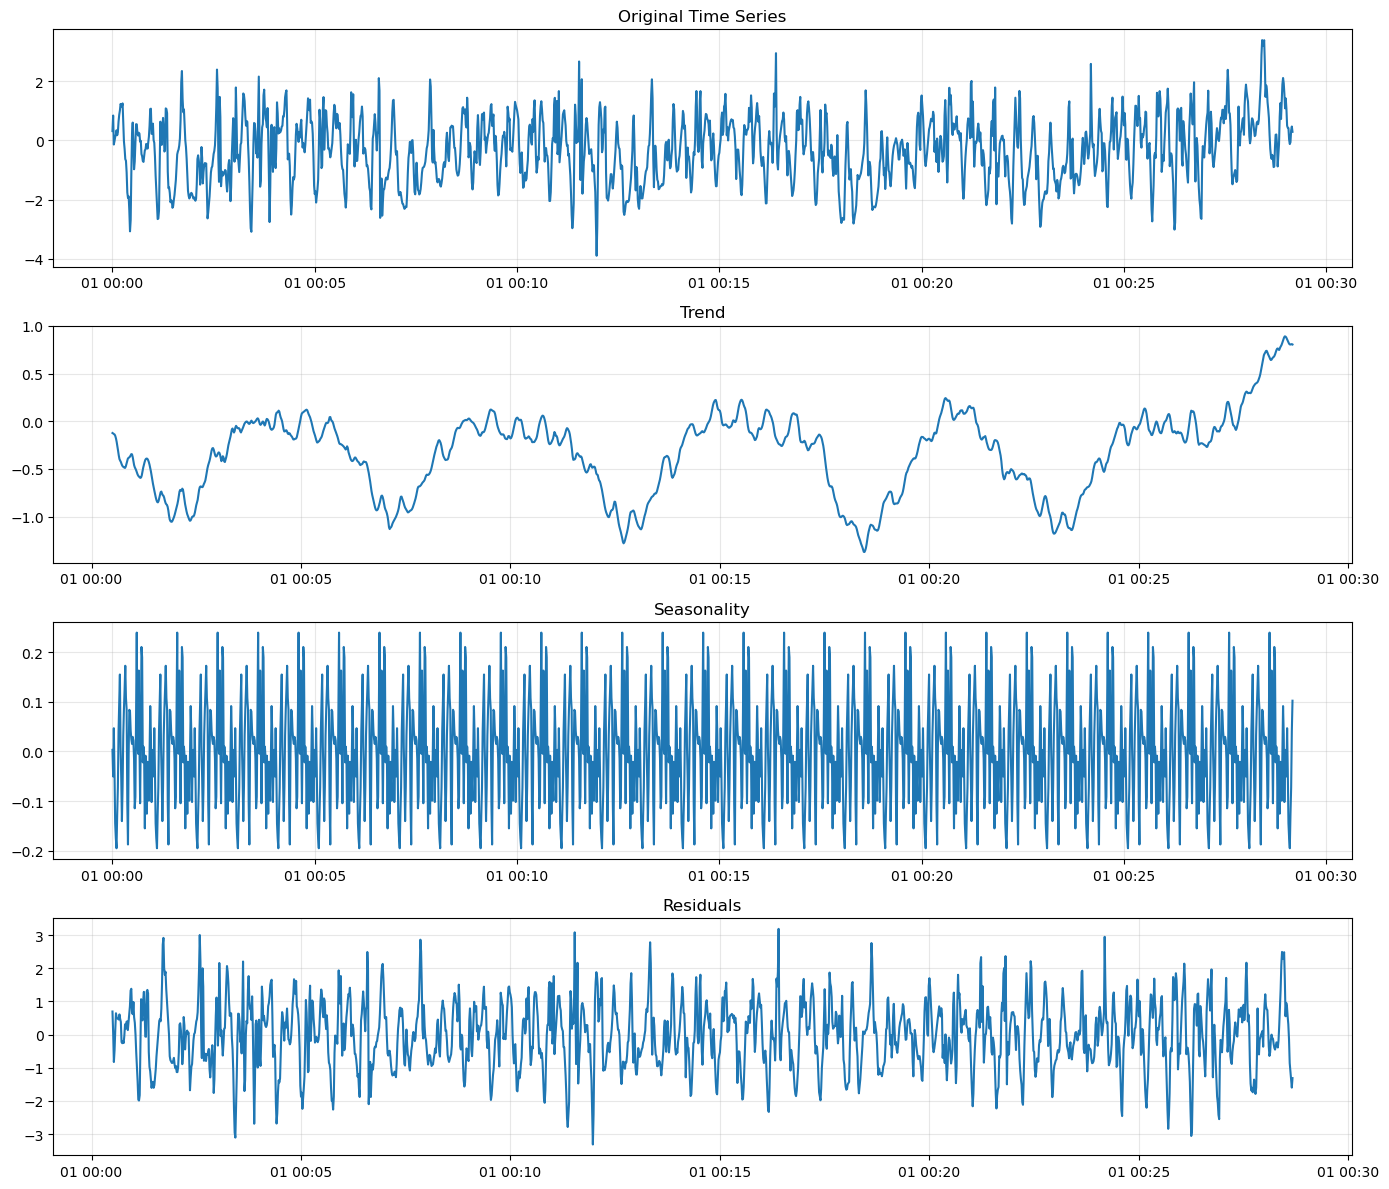

In [62]:
decomposition_add = sm.tsa.seasonal_decompose(
    sensor['rotationRate.x'],
    model='additive',
    period=60
)

plt.figure(figsize=(14, 12))
plt.subplot(411)
plt.plot(decomposition_add.observed)
plt.title('Original Time Series')
plt.grid(True, alpha=0.3)

plt.subplot(412)
plt.plot(decomposition_add.trend)
plt.title('Trend')
plt.grid(True, alpha=0.3)

plt.subplot(413)
plt.plot(decomposition_add.seasonal)
plt.title('Seasonality')
plt.grid(True, alpha=0.3)

plt.subplot(414)
plt.plot(decomposition_add.resid)
plt.title('Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Challenge 2 - Modelling the Data

1. To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

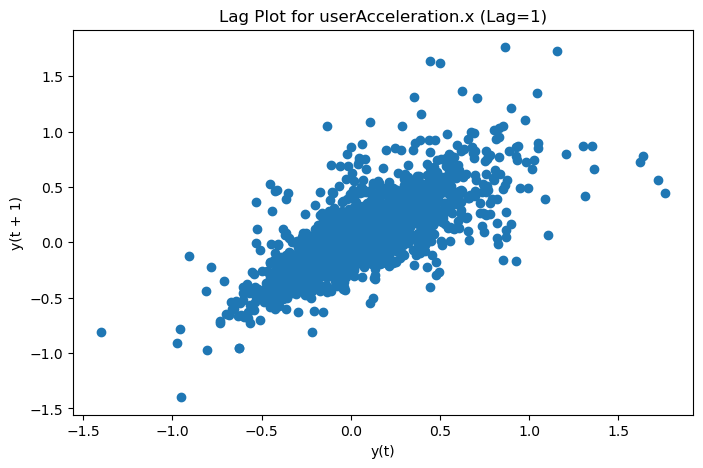

In [63]:
# Your code here:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

# Create a lag plot with lag=1 (compare t vs t-1)
plt.figure(figsize=(8, 5))
lag_plot(sensor['userAcceleration.x'], lag=1)  # Replace 'userAcceleration.x' with your column
plt.title('Lag Plot for userAcceleration.x (Lag=1)')
plt.show()


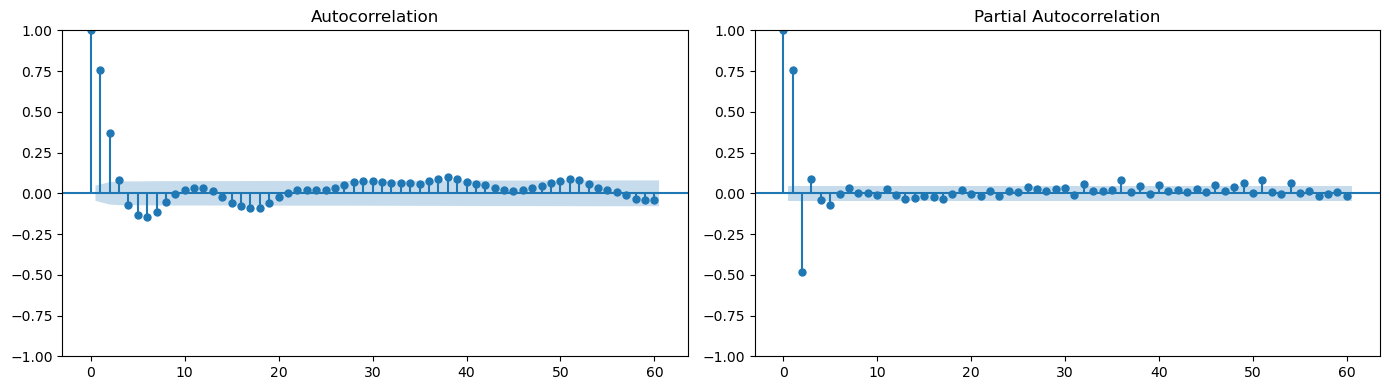

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Visualize ACF and PACF plots for the stationary series
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(sensor['userAcceleration.x'], lags=60, ax=axes[0])
plot_pacf(sensor['userAcceleration.x'], lags=60, ax=axes[1])
plt.tight_layout()
plt.show()

2. Create a lag plot for `rotationRate.x`

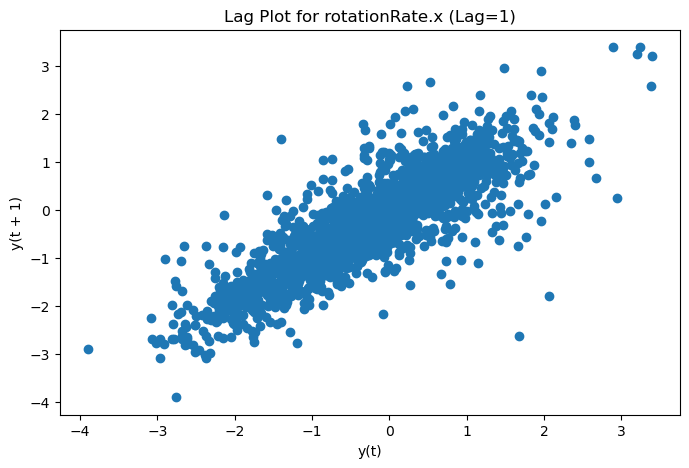

In [64]:
# Your code here:
# Create a lag plot with lag=1 (compare t vs t-1)
plt.figure(figsize=(8, 5))
lag_plot(sensor['rotationRate.x'], lag=1)  # Replace 'rotationRate.x' with your column
plt.title('Lag Plot for rotationRate.x (Lag=1)')
plt.show()



3. What are your conclusions from both visualizations?

#### Your conclusions here:

##### **Interpretation of the Lag Plots**  
A **45-degree upward cluster** (even if not perfectly tight) indicates **positive autocorrelation** in both `userAcceleration.x` and `rotationRate.x`. Here’s what that means:

1. **Positive Autocorrelation**:  
   - Today’s values are **related to yesterday’s values**.  
   - Example: If acceleration is high now, it’s likely to stay high in the next second.  

2. **Moderate Strength**:  
   - The "cluster" (not a perfect line) suggests **some randomness/noise** in the relationship.  
   - Example: Your step count today is *mostly* similar to yesterday’s, but not exactly the same.  

---

### **Why This Matters**  
- **Time Series Models** (like ARIMA) **thrive on autocorrelation**!  
- Your data has a "memory" of past values, which models can exploit for forecasting.  

---



4. The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [ ]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller Test for Stationarity
def perform_adf_test(series, title):
    print(f"\nADF Test for {title}:")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

# Perform ADF test on both series
perform_adf_test(sensor['userAcceleration.x'], "userAcceleration.x ")
perform_adf_test(sensor['rotationRate.x'], "rotationRate.x ")



ADF Test for userAcceleration.x :
ADF Statistic: -17.9580
p-value: 0.0000
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
Series is stationary (reject null hypothesis)

ADF Test for rotationRate.x :
ADF Statistic: -5.2699
p-value: 0.0000
Critical Values:
	1%: -3.4341
	5%: -2.8632
	10%: -2.5677
Series is stationary (reject null hypothesis)


In [80]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")

# Test userAcceleration.x
print("userAcceleration.x Stationarity Test:")
adf_test(sensor['userAcceleration.x'])

# Test rotationRate.x
print("\nrotationRate.x Stationarity Test:")
adf_test(sensor['rotationRate.x'])

userAcceleration.x Stationarity Test:
ADF Statistic: -17.957994086169748
p-value: 2.823439483037483e-30
Critical Values:
   1%: -3.434100824760071
   5%: -2.863196780129223
   10%: -2.5676520210882936

rotationRate.x Stationarity Test:
ADF Statistic: -5.269860625086418
p-value: 6.320230335912299e-06
Critical Values:
   1%: -3.4341465551936534
   5%: -2.863216966926812
   10%: -2.567662770090317


5. What are your conclusions from this test?

**Conclusion:**  
Both `userAcceleration.x` and `rotationRate.x` are **stationary**.  

**Why?**  
- The ADF test checks if your data has hidden trends (non-stationary).  
- **Null Hypothesis (H₀):** *"Data is **not** stationary (has trends)."*  
- **The Result:**  
  - **p-value ≈ 0.000** (<< 0.05) → **Reject H₀**.  
  - **ADF Statistic** is far below critical values → Strong evidence for stationarity.  

**What This Means:**  
- I can model the data **as-is** (no need to detrend or difference).  
- Stationarity = Stable patterns over time → Better for forecasting!  

**Think of It Like:**  
A stationary time series is like a calm lake (consistent waves).  
Non-stationary is like a rising tide (changing behavior).  
Your data is the calm lake! 🌊  


6. Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [85]:
# Your code here:
# %pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA

# Split Data:
train = sensor['userAcceleration.x'][:-10]  # All except last 10 rows  
test = sensor['userAcceleration.x'][-10:]   # Last 10 rows  

# Fit ARMA(2,1):
model = ARIMA(train, order=(2, 0, 1))  # (p=2, d=0, q=1) → ARMA(2,1)  
results = model.fit()  


/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


7. To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [90]:
# Your code here:
from statsmodels.tools.eval_measures import rmse

# Predict the next 10 values
predictions = results.forecast(steps=10)

# Get actual values from the test set (last 10 rows)
actual = test.values  # Convert to numpy array to avoid index issues

error = rmse(actual, predictions)
print(f"RMSE: {error:.4f}")

RMSE: 0.2253
